# Coverage profile and haplotype purging

Assemblies were generated from long reads and corrected using short reads for one iteration on PILON

In [1]:
mkdir 010.PurgeHaplotigs

In [1]:
WORKDIR=/workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs
ASSEMBLY_PATH=/workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs
ONT=/output/genomic/plant/Gillenia/trifoliata/Assembly/ONT_trimmed/All_AdapterRemoved.fastq.gz

In [3]:
cat $ASSEMBLY_PATH/assemblies.txt

/output/genomic/plant/Gillenia/trifoliata/31_ReleaseS4/01_Release/G3_2_S4.1.2KB.fasta


In [5]:
module unload perl/5.28.0
module load perl/5.28.0-thread-multi
module load bedtools/2.27.1
module load R/3.6.1
export PATH=$PATH:/workspace/hrarnc/GitHub/minimap2
module load conda/4.5.1
conda activate purge_haplotigs_env

(base) (/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [6]:
module load samtools
module list

(/workspace/appscratch/miniconda/purge_haplotigs_env) Currently Loaded Modulefiles:
  1) powerPlant/core            9) unixODBC/2.3.0
  2) texlive/20151117          10) JAGS/4.2.0
  3) pandoc/1.19.2             11) gdal/2.4.0
  4) git/2.21.0                12) proj/5.2.0
  5) perlbrew/0.76             13) R/3.6.1
  6) asub/2.1                  14) conda/4.5.1
  7) perl/5.28.0-thread-multi  15) samtools/1.9
  8) bedtools/2.27.1
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [7]:
python << EOF

import sys, os

f = open('$ASSEMBLY_PATH/assemblies.txt', 'r')

for line in f:
    assembly = line.split('\n')[0]
    assemblyName = line.split('/')[-1].split('.fa')[0]
    os.system('bsub -J minimap2 \
            -m aklppb39 \
            -n 40 \
            -o $WORKDIR/' + assemblyName + '_minimap2.out \
            -e $WORKDIR/' + assemblyName + '_minimap2.err \
            "minimap2 -t 40 --secondary=no -ax map-ont ' + assembly + ' $ONT | \
            samtools sort -@ 40 -o $WORKDIR/' + assemblyName + '.ONT.aligned.sorted.bam -"')


f.close()

EOF

Job <263739> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [8]:
export PATH=/workspace/appscratch/miniconda/purge_haplotigs_env/bin/:$PATH

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [9]:
purge_haplotigs hist

[12-08-2020 13:51:27] bedtools OK!
[12-08-2020 13:51:27] Rscript OK!
[12-08-2020 13:51:27] samtools OK!
[12-08-2020 13:51:27] ALL DEPENDENCIES OK



USAGE:
purge_haplotigs  hist  -b aligned.bam  -g genome.fasta  [ -t threads ]

REQUIRED:
-b / -bam       BAM file of aligned and sorted reads/subreads to the reference
-g / -genome    Reference FASTA for the BAM file.

OPTIONAL:
-t / -threads   Number of worker threads to use, DEFAULT = 4, MINIMUM = 2
-d / -depth     Maximum cutoff for depth. DEFAULT = 200, increase if needed,
                set much higher than your expected average coverage.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [10]:
# this step will generate a temp folder and running multiple jobs with the same folder generating can collapse
# better to create different subfolders and then run each job under different folder


python << EOF

f = open('$ASSEMBLY_PATH/assemblies.txt', 'r')


for line in f:
    assembly = line.split('\n')[0]
    assemblyName = line.split('/')[-1].split('.fa')[0]
    command = 'bsub -J hist \
    -m wkoppg32 \
    -n 20 \
    -o $WORKDIR/' + assemblyName + '_hist.out \
    -e $WORKDIR/' + assemblyName + '_hist.err \
    "purge_haplotigs hist \
    -b $WORKDIR/' + assemblyName + '.ONT.aligned.sorted.bam \
    -g ' + assembly + ' -t 20 -d 300"'
    print (command)

f.close()

EOF

(/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) (/workspace/appscratch/miniconda/purge_haplotigs_env) bsub -J hist     -m wkoppg32     -n 20     -o /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB_hist.out     -e /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB_hist.err     "purge_haplotigs hist     -b /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB.ONT.aligned.sorted.bam     -g /output/genomic/plant/Gillenia/trifoliata/31_ReleaseS4/01_Release/G3_2_S4.1.2KB.fasta -t 20 -d 300"
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [11]:
bsub -J hist     -m wkoppg32     -n 20     -o /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB_hist.out     -e /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB_hist.err     "purge_haplotigs hist     -b /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB.ONT.aligned.sorted.bam     -g /output/genomic/plant/Gillenia/trifoliata/31_ReleaseS4/01_Release/G3_2_S4.1.2KB.fasta -t 20 -d 300"

Job <263876> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

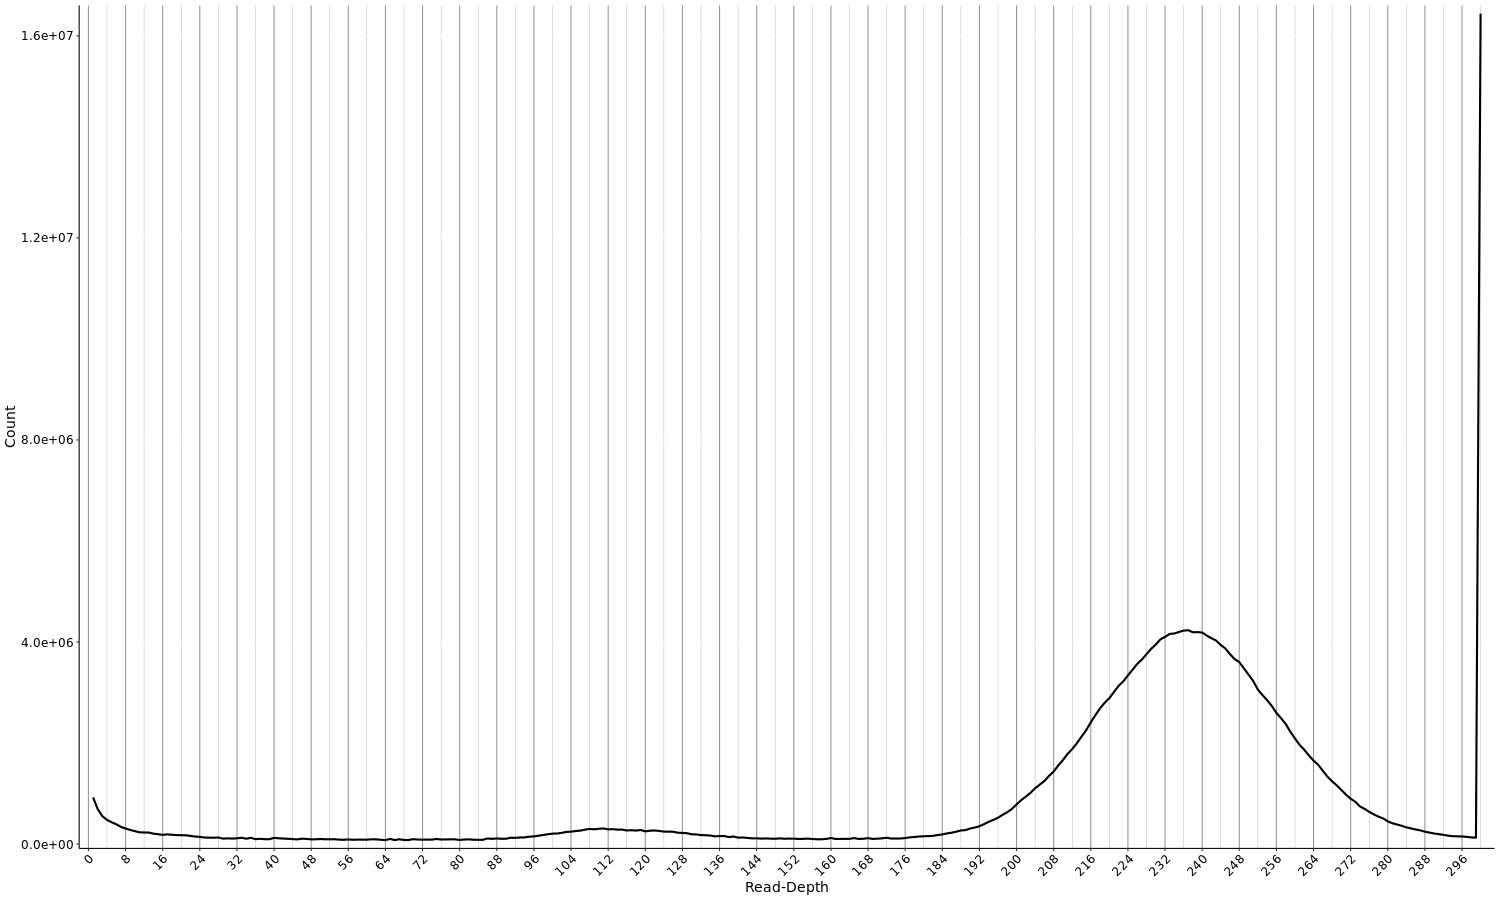

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [12]:
cat /workspace/hraczw/github/GA/Gillenia_genome/010.PurgeHaplotigs/G3_2_S4.1.2KB.ONT.aligned.sorted.bam.histogram.png | display

In [13]:
purge_haplotigs cov 


USAGE:
purge_haplotigs  cov  -i aligned.bam.genecov  -l <integer>  -m <integer>  -h <integer>  [-o coverage_stats.csv -j 80  -s 80 ]

REQUIRED:
-i / -in        The bedtools genomecov output that was produced from 'purge_haplotigs readhist'
-l / -low       The read depth low cutoff (use the histogram to eyeball these cutoffs)
-h / -high      The read depth high cutoff
-m / -mid       The low point between the haploid and diploid peaks

OPTIONAL:
-o / -out       Choose an output file name (CSV format, DEFAULT = coverage_stats.csv)
-j / -junk      Auto-assign contig as "j" (junk) if this percentage or greater of the contig is 
                low/high coverage (DEFAULT = 80, > 100 = don't junk anything)
-s / -suspect   Auto-assign contig as "s" (suspected haplotig) if this percentage or less of the
                contig is diploid level of coverage (DEFAULT = 80)

(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [14]:
bsub -J cov \
-o $WORKDIR/cov.out \
-e $WORKDIR/cov.err \
"purge_haplotigs cov \
-i $WORKDIR/G3_2_S4.1.2KB.ONT.aligned.sorted.bam.gencov \
-l 110 \
-m 236 \
-h 170 \
-o $WORKDIR/G3_2_S4.1.2KB.ONT.aligned.sorted.bam.coverage_stats.csv"

Job <263907> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1

In [2]:
ls $WORKDIR

assemblies.txt
cov.err
cov.out
G3_2_S4.1.2KB.fasta
G3_2_S4.1.2KB_hist.err
G3_2_S4.1.2KB_hist.out
G3_2_S4.1.2KB_minimap2.err
G3_2_S4.1.2KB_minimap2.out
G3_2_S4.1.2KB.ONT.aligned.sorted.bam
G3_2_S4.1.2KB.ONT.aligned.sorted.bam.bai
G3_2_S4.1.2KB.ONT.aligned.sorted.bam.coverage_stats.csv
G3_2_S4.1.2KB.ONT.aligned.sorted.bam.gencov
G3_2_S4.1.2KB.ONT.aligned.sorted.bam.histogram.png


In [33]:
purge_haplotigs purge

[06-04-2020 22:31:45] bash OK!
[06-04-2020 22:31:45] bedtools OK!
[06-04-2020 22:31:45] minimap2 OK!
[06-04-2020 22:31:45] samtools OK!

USAGE:
purge_haplotigs  purge  -g genome.fasta  -c coverage_stats.csv

REQUIRED:
-g / -genome        Genome assembly in fasta format. Needs to be indexed with samtools faidx.
-c / -coverage      Contig by contig coverage stats csv file from the previous step.

OPTIONAL:
-t / -threads       Number of worker threads to use. DEFAULT = 4
-o / -outprefix     Prefix for the curated assembly. DEFAULT = "curated"
-r / -repeats       BED-format file of repeats to ignore during analysis.
-d / -dotplots      Generate dotplots for manual inspection.
-b / -bam           Samtools-indexed bam file of aligned and sorted reads/subreads to the
                    reference, required for generating dotplots.
-f / -falconNaming  Rename contigs in the style used by FALCON/FALCON-unzip

ADVANCED:
-a / -align_cov     Percent cutoff for identifying a contig as a haplotig. DE

: 1

In [7]:
bsub -J purge \
-n 12 \
-o $WORKDIR/purge.out \
-e $WORKDIR/purge.err \
"purge_haplotigs purge \
-g /output/genomic/plant/Gillenia/trifoliata/31_ReleaseS4/01_Release/G3_2_S4.1.2KB.fasta \
-c $WORKDIR/G3_2_S4.1.2KB.ONT.aligned.sorted.bam.coverage_stats.csv \
-t 12 \
-d \
-b $WORKDIR/G3_2_S4.1.2KB.ONT.aligned.sorted.bam \
-o $WORKDIR/G3_2_S4.1.2KB.curated"

Job <265892> is submitted to default queue <lowpriority>.
(/workspace/appscratch/miniconda/purge_haplotigs_env) 

: 1